# EDA Loan Assessment

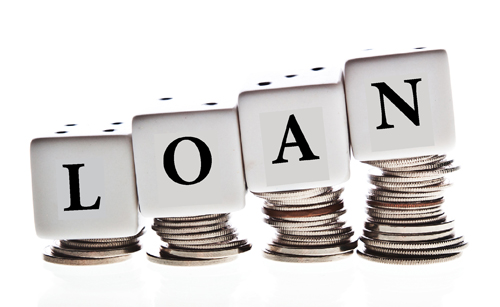

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.ticker as ticks
import random as rd

In [ ]:
pd.set_option('max_rows',None)
pd.set_option('display.max_columns',200)
sns.set_style('whitegrid')

# 1. Data Preparation

In [ ]:
app = pd.read_csv('/kaggle/input/bank-loan-risk-analysis/application_data.csv')
app.head()

In [ ]:
app.info(verbose=True)

In [ ]:
missing_val_app = app.isnull().sum()

In [ ]:
# Converting the missing values into percentage and wrap them into data frame

missing_perc_app = pd.DataFrame({'Columns':missing_val_app.index,'Percentage':(missing_val_app.values/app.shape[0])*100})
missing_perc_app

In [ ]:
# Plot the missing value percentage

plt.figure(figsize=(20,7))
sns.pointplot(data=missing_perc_app,x='Columns',y='Percentage')
plt.axhline(50,color='r',linestyle='--')
plt.title('Missing % in Application Dataset',fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Columns with more than 50% missing values

missing_more_50 = missing_perc_app[missing_perc_app['Percentage']>=50]
missing_more_50

In [ ]:
app1 = app.drop(columns=missing_more_50.Columns.to_list())
app1.head()

In [ ]:
# Remove the columns which are not necessary

app1 = app1.drop(columns=['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
       'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2',
       'EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'])
app1.head()

In [ ]:
# Check for the missing values in the columns where percentage is less than 50
less_50_missing = (app1.isnull().sum()/app1.shape[0])*100
less_50_missing[less_50_missing>0]

# 2. Handling the Missing values in each column

In [ ]:
app1.AMT_ANNUITY.describe()

### <font color='purple'>Comment :</font> 
Since the number of missing values in the AMT_ANNUITY column are very less so we can go on and impute the missing data with the mean value but since the max value is very high, imputing the data with median values will be a better approach

In [ ]:
app1.AMT_GOODS_PRICE.describe()

### <font color='purple'>Comment :</font> 
For AMT_GOODS_PRICE column it will be better if median is used because the column has the high values as the price can differ from product to product so imputing the missing values with median will be a better approach.

In [ ]:
app1.NAME_TYPE_SUITE.value_counts(normalize=True)

### <font color='purple'>Comment :</font> 
'Unaccompained' holds approx 81% of the total values so imputing the missing values with the mode value will be a suitable approach.

In [ ]:
# Check the OCCUPATION_TYPE variable

app1.OCCUPATION_TYPE.value_counts(normalize=True)

In [ ]:
# Checking the percentage of the missing data for OCCUPATION_TYPE variable
(app1.OCCUPATION_TYPE.isna().sum() / app1.shape[0])*100

In [ ]:
app1.CNT_FAM_MEMBERS.value_counts()

In [ ]:
# To check client ID for duplicate values

app1.SK_ID_CURR.nunique()

In [ ]:
# Again checking the summary statistics for the numerical columns
app1.describe()

### <font color='purple'>Comment :</font> 
While looking at the summary statistics for the numerical columns, it can be seen that there are few columns with the negative values. It would be better if these values are converted to the positive so that it would not affect the analysis. 

## 2.2.1 Standardizing the values for Application Dataframe

In [ ]:
# Convert the Days_Birth column

app1.DAYS_BIRTH = app1.DAYS_BIRTH.abs()

In [ ]:
# Convert the DAYS_EMPLOYED column

app1.DAYS_EMPLOYED = app1.DAYS_EMPLOYED.abs()

In [ ]:
# Convert the DAYS_REGISTRATION column

app1.DAYS_REGISTRATION = app1.DAYS_REGISTRATION.abs()

In [ ]:
# Convert the DAYS_ID_PUBLISH column

app1.DAYS_ID_PUBLISH = app1.DAYS_ID_PUBLISH.abs()

In [ ]:
# Now to see if we can calculate the age of the client 

app1['Age_Range'] = (app1.DAYS_BIRTH / 365).round(2)
app1.head()

### <font color='purple'>Comment :</font> 
Since the client's ages are more of the float values so categorizing them by following binning method can help in further analysis.

In [ ]:
# Taking the bins and the labels
bins = [0,30,40,50,60,100]
labels = ['<30','30-40','40-50','50-60','60+']

In [ ]:
# Binnig the age column
app1['AGE_RANGE'] = pd.cut(app1.Age_Range,bins=bins,labels=labels)

In [ ]:
# Removing Age_Range column after making bins out of it
app1.drop(columns='Age_Range',inplace=True)

In [ ]:
# Checking the Gender Column
app1.CODE_GENDER.value_counts()

In [ ]:
app1.CODE_GENDER.replace('XNA',np.nan,inplace=True)

In [ ]:
app1['ORGANIZATION_TYPE'].value_counts()

### <font color='purple'>Comment :</font> 
For ORGANIZATION_TYPE column there are 'XNA' values and 'other' column is also present, thus we can say that these XNA values are most probably the missing values. Moreover, these values are quite high, hence mode cannot be used here. The other way we can deal with these values is to either impute them with 'Unkown' category or we can ignore it while doing analysis.

## 2.3 Outlier Detection and Treatment

In [ ]:
# Setting the seaborn style
sns.set_style('white')
app1.describe()

### AMT_INCOME_TOTAL Variable

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_INCOME_TOTAL,orient='h',color='r')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(2000000))
ax.set_title('Income Total Amount',fontsize=50)
plt.xticks(rotation=90)
plt.show()

In [ ]:
app1.AMT_INCOME_TOTAL.describe()

### <font color='purple'>Comment :</font> 
As the max value is 1.17 X 10^8 which is infact a very high value but this is a valid value as income can vary from people to people. Hence, deleting the values can be an option but another better approach is to bin the values into categories then there it will be covered.

In [ ]:
app1.AMT_INCOME_TOTAL.quantile([0.33,.34,.66,0.90,0.92,0.94,0.95,0.96,0.98,0.99,1])

In [ ]:
bins = [0, 100000, 200000, 300000, 400000,200000000]
labels = ['Very Low','Low','Medium','High','Very High']

In [ ]:
app1['INCOME_RANGE'] = pd.cut(app1.AMT_INCOME_TOTAL,bins=bins,labels=labels)

### AMT_ANNUITY

In [ ]:
# Checking the AMT_ANNUITY variable

fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_ANNUITY,orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(10000))
ax.set_title('Annuity Amount',fontsize=50)
plt.xticks(rotation=90)
plt.show()

In [ ]:
app1.AMT_ANNUITY.describe()

### <font color='purple'>Comment :</font> 
There are outliers in the column AMT_ANNUITY so by taking bins the values can be a good approach to handle them.

In [ ]:
app1['AMT_ANNUITY'].quantile([0.33,0.66,0.9,0.92,0.94,0.95,0.96,0.98,0.99,1.0])

In [ ]:
# Setting up bins and labels for AMT_ANNUITY

bins = [0,10000,20000,30000,40000,500000]
labels = ['Very Low','Low','Medium','High','Very High']

app1['ANNUITY_RANGE'] = pd.cut(app1['AMT_ANNUITY'],bins=bins,labels=labels)

### AMT_GOODS_PRICE

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_GOODS_PRICE,orient='h',color='brown')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(100000))
ax.set_title('Goods Amount',fontsize=50)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
app1.AMT_GOODS_PRICE.describe()

In [ ]:
app1.AMT_GOODS_PRICE.quantile([0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99,1])

### <font color='purple'>Comment :</font> 
In the Goods Price column there are outliers present but these prices can vary from product to product. So, no action will be taken on this variable

### AMT_CREDIT

In [ ]:
app1.AMT_CREDIT.describe()

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.AMT_CREDIT,orient='h',color='orange')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(100000))
ax.set_title('Credit Amount',fontsize=50)
plt.show()

In [ ]:
app1.AMT_CREDIT.quantile([0.20,.33,.66,.90,.92,.94,.95,.96,.98,.99,1])

### <font color='purple'>Comment :</font> 
There are outliers after the 99 percentile values i.e 1.8 x 10^6 and it can be seen these outliers are in chunk thus we want to retain then as well, so binning them will be a good option here.

In [ ]:
# Creating bins and labels for AMT_CREDIT column
bins = [0,300000,600000,900000,1200000,5000000]
labels = ['Very Low','Low','Medium','High','Very High']

In [ ]:
# Binning the AMT_CREDIT column
app1['CREDIT_RANGE'] = pd.cut(x=app1.AMT_CREDIT,bins=bins,labels=labels)

### DAYS_BIRTH Variable

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(data=app1.DAYS_BIRTH,orient='h',color='darkcyan')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticks.MultipleLocator(1000))
ax.set_title('Age',fontsize=50)
plt.show()

### <font color='purple'>Comment :</font> 
By plotting the box plot for the client's Age column, it was found that there are no outliers in the DAYS_BIRTH column.

### DAYS_EMPLOYED Variable

In [ ]:
app1.DAYS_EMPLOYED.describe()

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(app1.DAYS_EMPLOYED,orient='h',color='yellow')
ax.set_title('Days Employed',fontsize=50)
ax.xaxis.set_major_locator(ticks.MultipleLocator(10000))
plt.xticks(rotation=90)
plt.show()

In [ ]:
years = 365243 / 365
years

In [ ]:
app1['DAYS_EMPLOYED'].quantile([.8,0.82,0.95,0.98,0.99,1.0])

In [ ]:
app1['DAYS_EMPLOYED'].value_counts().sort_index().tail(5)

### <font color='purple'>Comment :</font> 
For the Days Employed column, some records are having the value as 365243 which is not a possible value as in years it is nearly 1000 years, hence it is an invalid value. A better approach to handle these records is to replace these values with a near high value to last lowest percentile value like 20000 as last highest value is 17912.

### DAYS_ID_PUBLISH Variable

In [ ]:
fig = plt.figure(figsize=(20,5))

ax = sns.boxplot(app1.DAYS_ID_PUBLISH,orient='h',color='olive')

ax.set_title('Days Id Publish',fontsize=50)

ax.xaxis.set_major_locator(ticks.MultipleLocator(1000))

plt.xticks(rotation=90)

plt.show()

### <font color='purple'>Comment :</font> 
There are no outliers in the DAYS_ID_PUBLISH column so we can leave it as it is.

In [ ]:
# SOCIAL_CIRCLE Variables

app1.describe().loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DEF_60_CNT_SOCIAL_CIRCLE']

In [ ]:
# Checking for the SOCIAL CIRCLE columns 

l=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
color=['red','yellow','black','blue','darkcyan','orange','green','olive','brown']

fig=plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace = .2, wspace=.2)

for i in enumerate(l):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(y=app1[i[1]],color=rd.choice(color))
    plt.title(i[1],fontsize=10)
plt.show()

In [ ]:
app1[app1.DEF_60_CNT_SOCIAL_CIRCLE==24]

### <font color='purple'>Comment :</font> 
The Social Circle columns have only one huge outlier and the entry index of that record is 148403. Since there exists only one record having the invalid value so we can drop this record.

# 3. ANALYSIS : Application Dataframe

### 3.1 Data Imbalance Check

In [ ]:
# Checking the TARGET column for imbalance data in percentage
app1.TARGET.value_counts(normalize=True)*100

In [ ]:
# Plotting the graphs

fig, (ax1,ax2) = plt.subplots(1,2,figsize =(20,8))

ax = sns.countplot(app1.TARGET,ax=ax1)

ax1.set_title('TARGET',fontsize=20)

plt.setp(ax1.xaxis.get_majorticklabels(),fontsize=18)

ax2 = plt.pie(x=app1.TARGET.value_counts(normalize=True),autopct='%.2f',textprops={'fontsize':15},shadow=True,labels=['No Payment Issues','Payment Issues'],wedgeprops = {'linewidth': 5}) 

plt.title('Distribution of the Target Variable',fontsize=20)

plt.show()

In [ ]:
# Check the Imbalance Percentage

print('Imbalance Percentage is : %.2f'%(app1.TARGET.value_counts(normalize=True)[0]/app1.TARGET.value_counts(normalize=True)[1]))

In [ ]:
app1.head()

### 3.2 Categorical Variables

In [ ]:
# Setting the style for the plots
sns.set_style(style = 'whitegrid',rc={"grid.linewidth": 5})

In [ ]:
app1.nunique().sort_values()

### <font color='purple'>Comment :</font> 
By checking the unique value count for each column, we can distinguish between categorical and numerical variables from the application dataset. We can say that the values less than 40 are categorical columns and values more than 40 are basically the continous variables.


In [ ]:
# Function for univariate analysis
def plots(l,rows=1,cols=1,rot=90):
        
    if cols>1:
        fig, (ax1,ax2) = plt.subplots(nrows=rows,ncols=cols,figsize=(30,10))
        fig.subplots_adjust(hspace = .2, wspace=.2)
    
    else:
        fig, (ax1,ax2) = plt.subplots(nrows=rows,ncols=cols,figsize=(30,30))
        fig.subplots_adjust(hspace = .5, wspace=.1)
    
    
    # Subplot 1 : countplot 
    first = sns.countplot(data = app1 , hue = 'TARGET', palette='inferno',x=l,ax=ax1)
    first.set_title(l,fontsize=30)
    first.set_yscale('log')
    first.legend(labels=['Loan Repayers','Loan Defaulters'],fontsize=20)
    plt.setp(first.xaxis.get_majorticklabels(), rotation=rot,fontsize=25)
    plt.setp(first.yaxis.get_majorticklabels(),fontsize=18)


    # Percentage of the mean values for defaulters
    default_percentage = (app1.groupby(by=l)['TARGET'].mean()*100).sort_values()
    
    # Subplot 2 : barplot
    sec = sns.barplot(x=default_percentage.index,y=default_percentage,ax=ax2)
    sec.set_title(f'Default % in {l}',fontsize=30)
    sec.set_yscale('linear')
    plt.setp(sec.xaxis.get_majorticklabels(), rotation=rot,fontsize=25)
    plt.setp(sec.yaxis.get_majorticklabels(),fontsize=18)
    return None


### 3.2.1 Categorical Ordered Variables

The categorical Ordered columns are as follows :

1. NAME_EDUCATION_TYPE
2. CREDIT_RANGE
3. INCOME_RANGE
4. ANNUITY_RANGE

In [ ]:
list_Cat_num = ['NAME_EDUCATION_TYPE','CREDIT_RANGE','INCOME_RANGE','ANNUITY_RANGE']

for i in list_Cat_num:
    plots(i,1,2,rot=50)

### <font color='purple'>Comments</font> :

> 1. When we talk about the clients with respect to their Education type, those clients that have education status as secondary/ special secondary are approaching more for the loans while clients with education status as lower secondary are most at default. There is another category of incomplete higher which can also be considered for the loans.

> 2. For the CREDIT_RANGE variable, clients having the very low and low credit amounts are taking the most loans and on the other hand clients with low credit amounts are generally likely to default more so bank should consider them less while giving out the loans. Bank should focus more on the clients who have taken very high credit amounts.

> 3. As it can be seen from the graphs, income ranges from very low to meduim has the highest number of applications but it is adviced to focus more on the clients with atleast medium ranged income values or greater than medium values.

> 4. For AMT_ANNUITY column, most of the applications are from the low or medium ranged AMT_ANNUITY values but on the other hand, medium ranged values should be considered less for loan approval as they are highly at default. So, bank should consider low or very high ranged AMT_ANNUITY valued customers for loans.


### 3.2.2 Categorical Unordered Variables

The unordered categorical columns are as follows :

1. AGE_RANGE
2. REGION_RATING_CLIENT
3. CNT_FAM_MEMBERS
4. CNT_CHILDREN
5. FLAG_OWN_CAR
6. FLAG_OWN_REALTY
7. CODE_GENDER
8. NAME_CONTRACT_TYPE
9. NAME_INCOME_TYPE
10. NAME_FAMILY_STATUS
11. NAME_HOUSING_TYPE
12. OCCUPATION_TYPE

In [ ]:
list_categories = ['AGE_RANGE','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','CNT_CHILDREN']

for i in list_categories:
    plots(i,1,2,rot=0)

### <font color='purple'>**Comments**</font> :

> 1. In the AGE_RANGE variable, clients of age group lower than or equal to 30 have the maximum payment defaults. Clients with age group between 30 to 50 have taken the most number of loans and are preferred to target as they have less number of loan defaults.

> 2. It can be seen from the REGION_RATING_CLIENT variable that clients from  the regions where rating is 2 are taking the maximum number of the loans and have lesser loan default ratio than other regions, thus it can be considered to target. Moreover, clients from region as rating 3 are pretty much more prone to default.

> 3. The clients having the 11 and 13 family members have the highest default rate of 100% and most of the loans are taken by those clients who have less family members.

> 4. Clients having no children are the ones who have taken the most number of loans, on the other hand clients having 9 and 11 children are defaulting the most.

In [ ]:
list_categories = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','CODE_GENDER','NAME_CONTRACT_TYPE']

for val in list_categories:
    plots(val,1,2,rot=0)

### <font color='purple'>Comments</font> :

> 1. Clients having their own flat/house are much likely to repay the loans than those who do not and same can be observed for those who has their own vehicals.

> 2. As it can be seen from the graphs, females are taking more loans than males and are doing much better than the males in repaying the loans while males have taken less number of loans as compared to the females and on the other hand, their defaulting percentage is high.

> 3. It seems clients are interested more towards the cash loans type contract and are defaulting more on the loans while the revolving loan type contract are performing much better.

In [ ]:
list_categories = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

for i in list_categories:
    plots(i,1,2,rot=50)

### <font color='purple'>**Comments**</font> :


> 1. In the NAME_INCOME_TYPE variable, clients who are either businessman or student are pretty much likely to repay the loans and also for the working clients. While considering the clients who are Unemployed or are on Maternity Leave should be less likely be the ones for giving out the loan.

> 2. Clients that are single or hold civil marriage as their family status must be considered less while giving out loans because they are the ones with high default ratio. For the clients with the separated family status should be chosen very carefully when giving out loans. Married clients are approaching the bank more for the loans and can be considered to give out loans.

> 3. The clients that have own their own house/apartment or are using office apartment should be considered more often while giving out loans as clients living in the rented apartments are very risky to be considered for giving loans.

In [ ]:
plots('OCCUPATION_TYPE',1,2)

### <font color='purple'>Comments</font> :

> It is very risky to consider Low-skilled Laborers when considering clients on giving loans as the percentage of defaulters for this category is the most from other categories. Clients having the occupation such as Accountants,High skill tech staff,Managers,HR and IT staff or the "other" category are pretty much safe to consider for giving out loans and even small amount of loans to labourers can be given.

In [ ]:
# Plotting the ORGANIZATION_TYPE separately 

plots('ORGANIZATION_TYPE',rows=2)

### <font color='purple'>Comment</font>: 

> 1. By looking at the graph:

>> **a)** Industry Type : All industries except type 1,3,4,8,13 can be chosen for giving out loans more frequently as their default % is lower than these 5.

>> **b)** Transport Type : Bank should focus more on giving out loans to the transport type 1 and 2 as they are more likely to repay the loans on time than others.

>> **c)** It can be seen that organizations such as  Universities,Schools,Government can be beneficial ones to target for giving out loans as their chances to default out on loans are quite less.

> 2. Those organizations should be targeted more for the loans whose default % are quite lower than 10% when compared to other organizations.

### 3.2.3 Numeric - Categorical Variables

In [ ]:
# Dividing the data set into 2 parts target_0 : Loan Repayers and target_1 : Loan Defaulters

target_0 = app1[app1['TARGET']==0]

target_1 = app1[app1['TARGET']==1]

In [ ]:
# Creating a function for bivariate analysis

def cat_num_bivar(x=None,y=None,hue=None,est=np.mean,rot=90):
    plt.style.use('dark_background')
    fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    first = sns.barplot(data=target_0,x=x,y=y,hue=hue,palette='Set3',estimator=est,ax=ax1)
    first.set_title(f'Target 0 : {x} vs {y}',fontsize=20)
    plt.setp(first.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(first.yaxis.get_majorticklabels(),fontsize=18)

    sec  = sns.barplot(data=target_1,x=x,y=y,hue=hue,palette='Set3',estimator=est,ax=ax2)
    sec.set_title(f'Target 1 : {x} vs {y}',fontsize=20)
    plt.setp(sec.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(sec.yaxis.get_majorticklabels(),fontsize=18)

    plt.show()
    return None

### Education vs Credit

In [ ]:
cat_num_bivar(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')

### <font color='purple'>Comment : </font> 
Candidates who are having the academic degrees or higher education atleast are most likey to repay the loans where the credit amount that they have taken is less than 720000. On the other hand, some of these clients from these two categories are also the ones are defaulting and moreover the ones with values over 720000 are mostly defaulting. So, clients having secondary/ special secondary or with incompletely higher are pretty much safe to approach for loans.

### Occupation vs Income

In [ ]:
# Plotting the graphs with estimator as median

cat_num_bivar('OCCUPATION_TYPE','AMT_INCOME_TOTAL',est=np.median)

### <font color='purple'>Comment :</font> 
As Income variable has outliers so it is better to choose median than mean estimator, clients with occupations such as Managers, accountants, realty agents, IT staff, drivers are having good income. So out of these categories Managers and realty agents must not be chosen much for loan approvals as they are more likeyly to default on the loans. Moreover, categories with income lower than 150000 can be considered more for loans.

### Income type vs Credit

In [ ]:
# Plotting the graphs

cat_num_bivar('NAME_INCOME_TYPE','AMT_CREDIT')

### <font color='purple'>Comments</font> : 

1. The credit amount is the highest for the businessman while clients who are having pensions are taking low credit amount from the bank.

2. Clients having their own businesses or are students, repaying the loans completely whereas clients who are on maternity leave are least ones to be considered for giving out the loans. Care should be taken for State servants and for commercial clients while considering for loan approval.

### Housing type  vs Income

In [ ]:
# Plotting the graph with estimator as median

cat_num_bivar('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL',est=np.median)

### <font color='purple'>Comment :</font> 
The clients having the highest incomes are living in office apartments and the clients living with parents are earning quite less than others but are more prone to default the loans. The clients living in CO-OP apartments are much likely to default the most. Hence, bank should focus more towards clients having their own house/apartment or living in office apartments.

### CODE_GENDER vs AMT_INCOME_TOTAL

In [ ]:
cat_num_bivar('CODE_GENDER','AMT_INCOME_TOTAL',est=np.median)

### <font color='purple'>Comment :</font> 
From the above plots, we can say that males are earning more than females, on the other hand the default rate for the males are much higher.

### 3.2.4 Categorical - Categorical Variables

In [ ]:
def cat_cat(data1,data2,x,hue,scale='linear',order=None,rot=90):
    plt.style.use('dark_background')
    fig= plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)

    sns.countplot(data = data1,x=x,hue=hue,hue_order=order,palette='Spectral')
    plt.title(f'target 0 :{x} vs {hue}',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=25)
    plt.legend(fontsize=16)
    
    plt.subplot(1,2,2)
    sns.countplot(data = data2,x=x,hue=hue,hue_order=order,palette='Spectral')
    plt.title(f'target 1 :{x} vs {hue}',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=25)
    plt.legend(fontsize=16)
    plt.show()
    return None
    

**Name_housing vs Gender**

In [ ]:
cat_cat(target_0,target_1,'NAME_HOUSING_TYPE','CODE_GENDER','log',['M','F'])

### <font color='purple'>Comment :</font>

From the above plots it can be seen that males living with thier parents are much more likely to default than females. Females are more defaulting on the loans but the recovery rate is much better as compared to males.

### Occupation vs Family Status

In [ ]:
cat_cat(target_0,target_1,'OCCUPATION_TYPE','NAME_FAMILY_STATUS',scale='log')

### <font color='purple'>Comment :</font> 
Married and single clients are approaching the bank more for the loans on the other hand widows are approaching the less for the loans and are less likely to default. Married laborers are defaulting more as compared to single/not married.

### Income type vs Education type

In [ ]:
cat_cat(target_0,target_1,'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','log')

### <font color='purple'>Comment :</font> 
Clients with higher education who are on the maternity leave are less in number for taking loans and defaulting the most, so they should be less considered and for the unemployed ones clients with Secondary/ secondary special are mostly at default.

### NAME_FAMILY_STATUS vs FLAG_OWN_REALTY

In [ ]:
cat_cat(target_0,target_1,'NAME_FAMILY_STATUS',hue='FLAG_OWN_REALTY',scale='log',order=['Y','N'],rot=70)

### <font color='purple'>Comment -</font> 
From the above plot it can be seen that clients who own their own realty are approaching the bank more often for the loans and are more prone to default than those who do not own the realty.

### INCOME_RANGE vs CODE_GENDER

In [ ]:
cat_cat(target_0,target_1,'INCOME_RANGE',hue='CODE_GENDER',scale='log',order=['M','F'],rot=0)

### <font color='purple'>Comment :</font> 
Females are earning more than the males and there are more number of males that are earning very high amount. Females with either low or very low incomes are much likely to default than males but on the other hand males with higher incomes are defaulting more than females.

## 3.3 Numerical Variables

### 3.3.1 Univariate Analysis

In [ ]:
list_numerics=['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_BIRTH']

def plots_numeric_univ(l):
        sns.set_style(style='whitegrid')
        fig=plt.figure(figsize=(50,5))
        plt.subplot(1,5,1)
        sns.distplot(target_0[l],hist=False,label='Loan Repayers',color='green')
        sns.distplot(target_1[l],hist=False,label='Loan Defaulters',color='red')
        plt.title(l,fontsize=20)
        plt.show()
        
for i in list_numerics:
    plots_numeric_univ(i)

<font color='purple'> **Comments :**</font>

> 1. For AMT_ANNUITY variable, most of the clients have the amount less than 50000 and default rate is higher than repayer rate. 

> 2. The clients having the Credit value less than 1M are applying more for the loans.

> 3. The clients are applying more for the loans for the goods price less than 1M and for the higher goods price clients are repaying loans

> 4. For DAYS_BIRTH variable, clients who are less than 40yrs of age are more prone to default on loans than the others.


### 3.3.2 Bivariate Analysis

In [ ]:
# Creating the function for the numeric bivariate analysis

def plots_numeric_biv(x,y):
    sns.set_style(style='whitegrid')
    fig=plt.figure(figsize=(15,6))
    sns.scatterplot(data=target_0, y = y, x = x,label='Loan Repayers',color='darkcyan')
    sns.scatterplot(data=target_1, y = y, x = x,label='Loan Defaulters',color='red')
    plt.title(f'{x} vs {y}',fontsize=20)
    plt.show()

### AMT_ANNUITY vs AMT_GOODS_PRICE

In [ ]:
plots_numeric_biv('AMT_ANNUITY','AMT_GOODS_PRICE')

### <font color='purple'>Comment :</font> 
The AMT_ANNUITY and AMT_GOODS_PRICE are correlated but the correlation is not that strong as the values are pretty much distributed for higher Annuity and Goods price values. Hence, for AMT_ANNUITY less than 70000 are more prone to default while values greater than 70000 the defaulters tend to decrease.

### AMT_ANNUITY vs AMT_CREDIT

In [ ]:
plots_numeric_biv('AMT_ANNUITY','AMT_CREDIT')

### <font color='purple'>Comment :</font> 
The AMT_ANNUITY and AMT_CREDIT are fairly correlated with each other and the number of defaulters tend to go down as the  AMT_ANNUITY increases. Most of the defaulters are having AMT_ANNUITY values less than 60000.

### AMT_GOODS_PRICE vs AMT_CREDIT

In [ ]:
plots_numeric_biv('AMT_GOODS_PRICE','AMT_CREDIT')

### <font color='purple'>Comment :</font> 
The graph show a pretty strong correlation between AMT_GOODS_PRICE and AMT_CREDIT, clients having high goods price are most likely to repay the loans as majority of defaulters are having goods price less than 1.4 million. 

In [ ]:
# PLotting the pairplot 
l=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.pairplot(data = app1, vars=l,hue='TARGET',palette=['b','orange'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# 4. Correlation : Application Dataset

### <font color='purple'>TARGET 0 : Loan Repayer</font>

In [ ]:
# Dropping the columns which are not required
cols_drop = ['SK_ID_CURR','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [ ]:
# Correlation matrix
target_0 = target_0.drop(columns=cols_drop)

corr = target_0.corr().abs().round(3)
corr

In [ ]:
# Visualise the correlation using heatmaps

fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr,annot=True,cmap='RdYlGn_r',linewidths=.5,center=0.1)

plt.show()

In [ ]:
# Unstacking the TARGET_0 variable
c = corr.abs()
s=c.unstack()

In [ ]:
# Finding top 10 correlation among the people with no payment issues

target_0_corr = s[s.index.get_level_values(0)!= s.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

df = pd.DataFrame(target_0_corr)

df = df.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

df.head(10)

### <font color='purple'>TARGET 1 : Loan Defaulter</font>

In [ ]:
# Drop the columns which are not required
target_1 = target_1.drop(columns=cols_drop)

In [ ]:
# Creating the correlation matrix for the Loan defaulter data frame
corr_t1 = target_1.corr().abs().round(3)

corr_t1

In [ ]:
# PLotting the heatmap 
fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr_t1,annot=True,cmap='RdYlGn_r',linewidths=0.5,center=0.1)

plt.show()

In [ ]:
c1 = corr_t1

s1 = c1.unstack()

In [ ]:
# Top 10 Correlations from target_1 : Loan Defaulter data frame

target_1_corr = s1[s1.index.get_level_values(0)!= s1.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

df = pd.DataFrame(target_1_corr)

df = df.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

df.head(10)

### <font color='purple'>Comment :</font> 

> For target variable there is no correlation as there are empty space in the graph and NAN in the tables while comparing with other variables.

> Credit amount is highly correlated with amount of goods price which is slightly different from target 0 i.e Loan Repayers.

> The correlation is strong between family member and children counts, although the correlation increases for the defaulters.

> The loan annuity correlation with credit amount and also with goods price has slightly reduced in defaulters(0.748) when compared to repayers(0.777)

> We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

> Days_birth and number of children correlation has reduced to 0.256 in defaulters when compared to 0.336 in repayers.

# 5. Previous Application Dataset

### <font color='purple'>5.1 Loading the Data</font>

In [ ]:
# Fetching the dataset

## 'app' variable takes the dataset application_data.csv as Data Frame

f = '/kaggle/input/bank-loan-risk-analysis/previous_application.csv'
# Count the lines
num_lines = sum(1 for l in open(f))
# Sample size - in this case ~50%
size = int(num_lines // 2)
# The row indices to skip - make sure 0 is not included to keep the header!
rd.seed(100)
skip_idx = rd.sample(range(1, num_lines), num_lines - size)
# Read the data
prev_app = pd.read_csv(f, skiprows=skip_idx)

prev_app.head()

In [ ]:
# Shape of the dataset
prev_app.shape

In [ ]:
# Missing values check
prev_app.isna().sum()

In [ ]:
# Setting the style for the plots
sns.set_style(style='whitegrid')

In [ ]:
# Converting the absolute missing values into percentage

missing_prev = ((prev_app.isna().sum() / prev_app.shape[0])*100)

cols1 = missing_prev.index.to_list()

vals1 = missing_prev.to_list()

missing_prev_app = pd.DataFrame({'Columns':cols1,'Missing_prev_Percentage':vals1})

missing_prev_app.sort_values(by='Missing_prev_Percentage')

### 5.2 Missing Values check

In [ ]:
# Plot for missing values in previous application data frame
fig = plt.figure(figsize=(20,8))

ax = sns.pointplot(data = missing_prev_app, x='Columns', y = missing_prev_app.Missing_prev_Percentage,color='blue')

ax.axhline(50,color='red',linestyle='--')

ax.set_title('Missing Values % for Previous Applications ',fontsize=20)

ax.set_xlabel('Columns',fontsize=15)

ax.set_ylabel('Missing Percentage',fontsize=15)

ax.set_xticklabels(labels=cols1,rotation=90)


plt.show()


In [ ]:
# Dropping the columns with more than 50 % missing values
prev_app.drop(columns=missing_prev[missing_prev>=50].index,inplace=True)

In [ ]:
prev_app.info()

In [ ]:
prev_app.describe()

# 6. Merged Dataset

In [ ]:
# Merge the datasets
merged_df = app1.merge(right=prev_app,on='SK_ID_CURR')

In [ ]:
# Check the shape of the data
merged_df.shape

In [ ]:
merged_df.head()

### <font color='purple'>Comment :</font> 
After merging the datasets if was found that some columns have the name for example, `abc_x` and `abc_y`  so `x` - **means that the column represents the application dataset columns** and `y` - **represents the columns from the previous application dataset**.

### DAYS_DECISION Variable

In [ ]:
merged_df['DAYS_DECISION'] = merged_df['DAYS_DECISION'].abs()

### <font color='purple'>Comment :</font> 
The values has some negative values so let's convert them into positive

In [ ]:
merged_df.nunique().sort_values()

## 6.1 Categorical Variables

In [ ]:
# Dividing the merged dataset into two parts on the basis of Loan Approval and Loan Refusal

df1= merged_df[merged_df['NAME_CONTRACT_STATUS']=='Approved']

df2= merged_df[merged_df['NAME_CONTRACT_STATUS']=='Refused']

df3= merged_df[merged_df['NAME_CONTRACT_STATUS']=='Canceled']

In [ ]:
# Function to analyze the categorical columns

def cat_1(x,hue,scale='linear',order=None,rot=90,hspc=0.3):
    plt.figure(figsize=(25,25))
    
    plt.subplots_adjust(wspace=0.3,hspace=hspc)
    plt.subplot(2,2,1)
    sns.countplot(data = df1,x=x,hue=hue,hue_order=order,palette=['darkcyan','darkgrey'])
    plt.title(f'Approved :{x} ',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=18)
    plt.yticks(fontsize=15)
    plt.legend(labels=['Loan Repayers','Loan Defaulters'],fontsize=16)
        
    plt.subplot(2,2,2)
    sns.countplot(data = df2,x=x,hue=hue,hue_order=order,palette=['darkcyan','darkgrey'])
    plt.title(f'Refused :{x} ',fontsize=20)
    plt.yscale(scale)
    plt.xticks(rotation=rot,fontsize=18)
    plt.yticks(fontsize=15)
    plt.legend(labels=['Loan Repayers','Loan Defaulters'],fontsize=16)
    
    # default % in approval
    ax=(df1.groupby(by=x)['TARGET'].mean()*100).sort_values()
    
    
    plt.subplot(2,2,3)
    a = sns.barplot(x=ax.index,y=ax)
    a.set_title(f'Default % in Approval : {x}',fontsize=20)
    a.set_yscale('linear')
    plt.setp(a.xaxis.get_majorticklabels(), rotation=rot,fontsize=18)
    plt.setp(a.yaxis.get_majorticklabels(),fontsize=18)
    
    
    # default % in refused
    ax1=(df2.groupby(by=x)['TARGET'].mean()*100).sort_values()
    
    plt.subplot(2,2,4)
    a = sns.barplot(x=ax1.index,y=ax1)
    a.set_title(f'Default % in Refusal : {x}',fontsize=20)
    a.set_yscale('linear')
    plt.setp(a.xaxis.get_majorticklabels(), rotation=rot,fontsize=18)
    plt.setp(a.yaxis.get_majorticklabels(),fontsize=18)
    
    plt.show()
    return None

### NAME_CLIENT_TYPE

In [ ]:
cat_1(x='NAME_CLIENT_TYPE',hue='TARGET',scale='log',rot=50,hspc=0.4)

### <font color='purple'>Comment :</font> 
The bank is approving loans for repeater and new clients where new clients are actually making more defaults than the repeaters. So, bank should primarily focus more on refreshed/repeaters.

### PRODUCT_COMBINATION

In [ ]:
cat_1(x='PRODUCT_COMBINATION',hue='TARGET',scale='log',hspc=0.7)

### <font color='purple'>Comment :</font> 
Bank has approved the loans highly for POS categories and they are less likely to default than other categories like cash X / car, hence, bank can consider to give out loans POS categories more.

### NAME_SELLER_INDUSTRY

In [ ]:
cat_1(x='NAME_SELLER_INDUSTRY',hue='TARGET',scale='log',hspc=0.5)

### <font color='purple'>Comment :</font> 
While looking at the distribution graphs, bank is giving loans more towards the categories like consumer electronics,connectivity,furniture. The most of the default done by the category is Auto technology. Hence, banks should approve more loans for the categories like tourism, furniture, clothing, consumer electronics.

### NAME_PRODUCT_TYPE

In [ ]:
cat_1(x='NAME_PRODUCT_TYPE',hue='TARGET',scale='log',rot=50)

### <font color='purple'>Comment :</font> 
Bank is approving loans more for the product type category X-sell and can be considered more to give out loans. Bank is actually refusing the loans to X- sell more than walk-ins and it can be seen form the graphs that walk-ins are more prone to default than X-sell.

### NAME_CASH_LOAN_PURPOSE

In [ ]:
cat_1(x='NAME_CASH_LOAN_PURPOSE',hue='TARGET',scale='log',hspc=0.7)

### <font color='purple'>Comment :</font> 
Categories like repairs, other, urgent needs, buying a used car are getting more approvals from the bank, out of which urgent needs is most at default. Bank is approving the loans for a particular category Money for a third person which a very risky driving factor for the bank to give out loans on. Bank is on the other hand has refused to give the loans for the Money for a third person which is the correct step taken by the bank but on the other hand bank is also refusing the categories which may turn out to be beneficial for the bank itself, those categories are - Buying a new car/used car, garage, home or a holiday home/ land.

### NAME_CONTRACT_TYPE

In [ ]:
cat_1(x='NAME_CONTRACT_TYPE_y',hue='TARGET',scale='log',rot=50)

### <font color='purple'>Comment :</font> 
Bank is approving loans more in general for consumer loans and refusing the loans more oftenly for the cash loans. From the above graphs, it is clearly visible that revolving loans should be considered less for the approval whereas consumer loans / cash loans can be considered more oftenly for the loans.

In [ ]:
merged_df.head()

In [ ]:
# Funciton for numerical - categorical analysis

def cat_num_bivar_merged(x=None,y=None,hue=None,est=np.median,rot=90):
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(30,13))
    plt.subplots_adjust(wspace=0.3)
    
    plt.subplot(1,3,1)
    first = sns.barplot(data=df1,x=x,y=y,hue=hue,palette='Set3',estimator=est)
    first.set_title(f'Approval : {x} vs {y}',fontsize=18)
    plt.setp(first.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(first.yaxis.get_majorticklabels(),fontsize=18)
    

    plt.subplot(1,3,2)
    sec = sns.barplot(data=df2,x=x,y=y,hue=hue,palette='Set3',estimator=est)
    sec.set_title(f'Refusal : {x} vs {y}',fontsize=18)
    plt.setp(sec.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(sec.yaxis.get_majorticklabels(),fontsize=18)
    
    plt.subplot(1,3,3)
    third = sns.barplot(data=df3,x=x,y=y,hue=hue,palette='Set3',estimator=est)
    third.set_title(f'Cancelled : {x} vs {y}',fontsize=18)
    plt.setp(third.xaxis.get_majorticklabels(),rotation=rot,fontsize=25)
    plt.setp(third.yaxis.get_majorticklabels(),fontsize=18) 
    
    plt.show()
    return None

### NAME_PRODUCT_TYPE vs AMT_GOODS_PRICE_y

In [ ]:
cat_num_bivar_merged(x='NAME_PRODUCT_TYPE',y='AMT_GOODS_PRICE_y',rot=0)

### <font color='purple'>Comment :</font> 
Banks are giving most approvals to X-sell type goods on the basis of price but it can be seen from the refusal section that X-sell is getting more rejections as the clients are not able to cope up with the price which is the strong reason. Hence, that is why clients are mostly cancelling their applications of the loan due to this reason as it can be seen graphically, the of most rejections from the clients are for the higher priced goods. Lastly, a driving solution is to lower the goods price from the seller's side.

### NAME_SELLER_INDUSTRY vs AMT_GOODS_PRICE_y

In [ ]:
cat_num_bivar_merged(x='NAME_SELLER_INDUSTRY',y='AMT_GOODS_PRICE_y',rot=90)

### <font color='purple'>Comment :</font>  
For 'XNA' we will ignore the observation as they are missing values or Unknowns.
From the above plots, it can be seen that tourism is getting the highest number of approvals followed by MLM partners from the bank. The loan applications for the tourism of many clients is rejected as they are not capable of repaying the loan due to the high package prices most probably. So, the tourism industry should lower the prices so that more clients can be provided with loans and so the bank/industry can make profits.

### PRODUCT_COMBINATION vs AMT_GOODS_PRICE_y

In [ ]:
cat_num_bivar_merged(x='PRODUCT_COMBINATION',y='AMT_GOODS_PRICE_y',rot=90)

### <font color='purple'>Comment :</font> 
The categories like cash street: low and cash X-sell: low have the highest price and it can be clearly seen from the graph that banks are giving approvals for those clients that can take the loans but on the refusal side these two are getting mostly refused due to the very high prices as clients are finding difficult to repay the loans on such ammount due to which bank is facing a loss of interest from the clients so bringing down the rates of the combined goods can help the bank to get more approvals on client loan applications. Lastly, POS industry with interest category is also getting cancellations from the client's side as the price of the goods are very much higher as compared to others so clients might have received worst pricing from the sellers which is why they are cancelling their loan applications. However, lowering the price can help getting the bank more approvals.

### NAME_GOODS_CATEGORY vs AMT_GOODS_PRICE_y

In [ ]:
cat_num_bivar_merged(x='NAME_GOODS_CATEGORY',y='AMT_GOODS_PRICE_y',rot=90)

### <font color='purple'>Comment :</font> 
The most of the approvals done by the bank are on the categories like vehicles, tourism, Medical supplies, direct sales, medicine. The most of the refusals by the bank are on the categories like weapon, Additional service, tourism, direct sales. The clients are taking their applications down most prabably down to the higher package prices for the tourism and other categories like medical supplies. So, lowering the prices can be a solution.

### NAME_CASH_LOAN_PURPOSE vs AMT_GOODS_PRICE_y

In [ ]:
cat_num_bivar_merged(x='NAME_CASH_LOAN_PURPOSE',y='AMT_GOODS_PRICE_y',rot=90)

### <font color='purple'>Comment :</font> 
The bank is approving loans for the clients who wants to buy a home or new car mostly and on the other hand the refusals are highest for the categories like buying a new car, buying a home and buying a holiday home or land. The applications cancelled by the clients are fot eh buying a home where the clients are most probably be losing the interest because high price possibility.

## 6.2 Numerical Variables

In [ ]:
# Plotting the numeric variables 

list_cat = ['AMT_ANNUITY_y','AMT_GOODS_PRICE_y']

def plots_numeric_univ_merged(l):
        sns.set_style('whitegrid')
    
        fig=plt.figure(figsize=(30,6))
        plt.subplot(1,2,1)
        ax=sns.distplot(df1[l],hist=False,label='Approved',color='green')
        ax=sns.distplot(df2[l],hist=False,label='Refused',color='red')
        ax=sns.distplot(df3[l],hist=False,label='Canceled',color='orange')
        plt.title(l,fontsize=20)
        plt.xticks(fontsize=15) 
        plt.show()
        return None
        
for i in list_cat:
    plots_numeric_univ_merged(i)

<font color='purple'>Comment :</font> 

> 1. Most of the approvals for the amount annuity variable are for the values less than 300000.

> 2. As the price amount of the goods increases there is an increase in loan applicaiton refusal.

In [ ]:
ord1= ['Approved','Refused','Canceled','Unused offer']

def plots_numeric_biv_merged(x,y,order=None):
    
    fig=plt.figure(figsize=(20,10))
    
    plt.subplot(1,2,1)
    
    sns.scatterplot(data=merged_df, y = y, x = x,hue='NAME_CONTRACT_STATUS',palette=['g','r','yellow','white'],hue_order=order)
    
    plt.title(f'{x} vs {y}',fontsize=20)
    
    plt.xticks(fontsize=18)
    
    plt.yticks(fontsize=18)
    
    plt.show()
    
    return None

### AMT_ANNUITY_y vs AMT_CREDIT_y

In [ ]:
plots_numeric_biv_merged('AMT_ANNUITY_y','AMT_CREDIT_y',order=ord1)

### <font color='purple'>Comment :</font> 
AMT_ANNUITY_y and AMT_CREDIT_y have a correlation but not a strong one, most of the loan refusals are less than the amount annuity of 100000.

### AMT_GOODS_PRICE_y vs AMT_CREDIT_y

In [ ]:
plots_numeric_biv_merged('AMT_GOODS_PRICE_y','AMT_CREDIT_y',order=ord1)

### <font color='purple'>Comment :</font> 
The correlation is strong between amount goods and amount credit continous variables and the distribution seems to be nearly equal for approval and refusal of loans. For the cancelled applications, it is more sparsely distributed for higher goods price.

### AMT_ANNUITY_y vs AMT_GOODS_PRICE_y

In [ ]:
plots_numeric_biv_merged('AMT_ANNUITY_y','AMT_GOODS_PRICE_y',order=ord1)

### <font color='purple'>Comment :</font> 
The correlation between AMT_ANNUITY_y and AMT_GOODS_PRICE_y is weak and it can be seen for higher goods price and amount annuity between 0 - 100000 there are highest number of refusals.

### AMT_GOODS_PRICE_y vs AMT_APPLICATION

In [ ]:
plots_numeric_biv_merged('AMT_GOODS_PRICE_y','AMT_APPLICATION',order=ord1)

### <font color='purple'>Comment :</font> 
There is a pretty strong correlation between Goods Price and application. As the goods price amount increases, application amount increases linearly and the distribution of refusal loans seems to increase.

In [ ]:
(merged_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].value_counts(normalize=True)*100)

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET',palette='rocket')
plt.legend(['Loan Repayers','Loan Defaulters'])
plt.yscale('log')
plt.xticks(fontsize=25)
plt.show()

### <font color='purple'>Comment :</font> 

> 1. Bank has approved the loan for approx 92% clients who can actually repay the loans without any trouble. On the other hand banks are approving loans for the clients who are most likely to default and their percentage is 7.6%.

> 2. The clients are cancelling the applications from their side as they might be losing interest in taking the loan from the bank because of high price issues with the products as most of them are actually capable to pay the loans without any issue, hence dropping the product prices can attract more clients into loans.

> 3. Bank is actually refusing the loans of those clients who can repay their loans easily without any issues and this percentage is 88%. So, bank needs to focus more on the clients like them.

# 7. Conclusion

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. We aim to understand the driving factors behind loan defaults for different types of applicants.

Analysis was conducted on the prospective clients based on the their current as well as previous application data. Recommendations and insights were provided for the same.